# Fingerprint para calculo de toxicidade ===> indice ToxCast

**Distribuição dos indices, peso molecular e outros**

Descriptores já calculados e colocados na planilha

calculos para a tese

Ajustar config notebook para ...GPU 4  RAM alta

Exemplo de aplicação:

https://zoehlerbz.medium.com/neural-network-application-with-python-and-rdkit-for-drug-toxicity-prediction-9acda4685273


In [ ]:
!pip install tensorflow

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 58.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt # Import the library

In [ ]:
import sklearn
import rdkit

print(tf.__version__)
print(rdkit.__version__)


2.18.0
2024.09.6


# **planilha com os SMILES e indice de toxicidade "ToxCast_final4.csv"**

In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving ToxCast_final4.csv to ToxCast_final4.csv


In [ ]:
# matriz
data

,SMILES,ToxCast
0,OCCOC(=O)C1=CC=CC=C1O,3
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31
2,CC(CC1=CC=CC=C1)NCCCCl,0
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35
...,...,...
8740,CCCCCCCCNC,0
8741,CCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,16
8742,OC(=O)C1=CC=CC(Cl)=C1Cl,0
8743,ClCC=CCl,0


# Distribuição dos indices

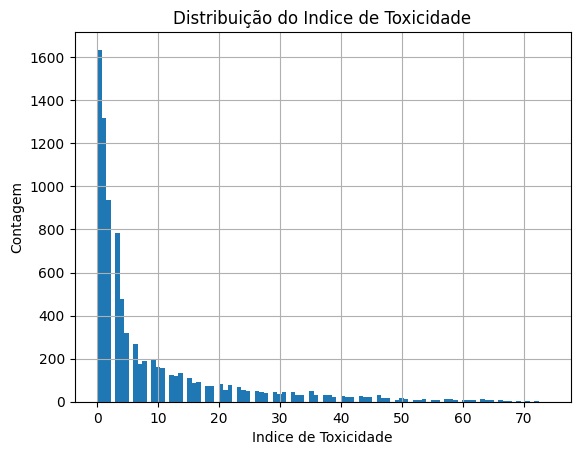

In [ ]:
data['ToxCast'].hist(bins=100)

plt.ylabel('Contagem')
plt.xlabel('Indice de Toxicidade')
plt.title('Distribuição do Indice de Toxicidade')
plt.show()

**Representação de Moléculas**

 podemos adicionar uma coluna ao DataFrame contendo as representações moleculares correspondentes aos SMILES.

 usando método `AddMoleculeColumnToFrame` da biblioteca PandasTools

In [ ]:
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(frame=data, smilesCol='SMILES')
#data    <== visualiza as moleculas

data.head()

[23:28:11] WARNING: not removing hydrogen atom without neighbors
[23:28:11] WARNING: not removing hydrogen atom without neighbors


,SMILES,ToxCast,ROMol
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x79e00876fbc0>
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x79e00876d4d0>
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x79e00876fb50>
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x79e00876fc30>
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x79e00876fca0>


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def featurize_molecule(mol):
    return {
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'TPSA': Descriptors.TPSA(mol),

    }

def featurize_dataframe(data):
    feats = [featurize_molecule(m) for m in data['ROMol']]
    feats_df = pd.DataFrame(feats)
    return pd.concat([data.reset_index(drop=True), feats_df], axis=1)

data = featurize_dataframe(data)
data.head()

,SMILES,ToxCast,ROMol,MolWt,LogP,TPSA
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x79e00876fbc0>,182.175,0.5413,66.76
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x79e00876d4d0>,312.453,4.6436,34.14
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x79e00876fb50>,211.736,2.8361,12.03
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x79e00876fc30>,423.901,1.4786,103.04
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x79e00876fca0>,409.782,5.6828,0.00


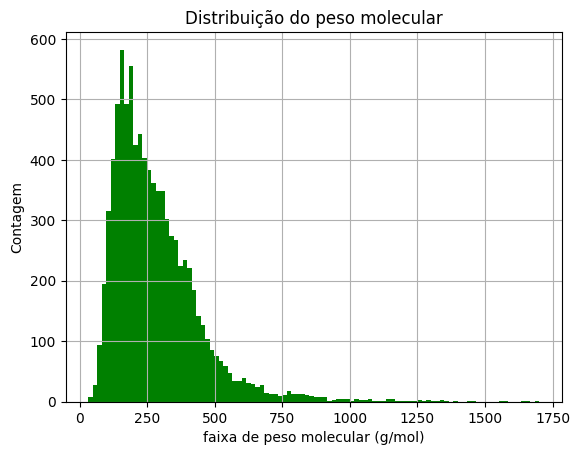

In [ ]:
data['MolWt'].hist(bins=100, color='green')
plt.title('Distribuição do peso molecular')
plt.ylabel('Contagem')
plt.xlabel('faixa de peso molecular (g/mol)')
plt.show()

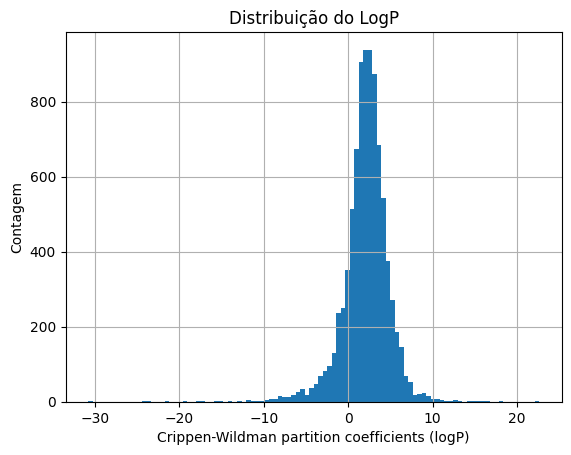

In [ ]:
data['LogP'].hist(bins=100)
plt.title('Distribuição do LogP')
plt.ylabel('Contagem')
plt.xlabel('Crippen-Wildman partition coefficients (logP)')
plt.show()
# Crippen-Wildman partition coefficients (logP) are assigned to each atom as a
# measure of atomic lipophilicity, determined in the same way as Crippen-Wildman molar refractivity.

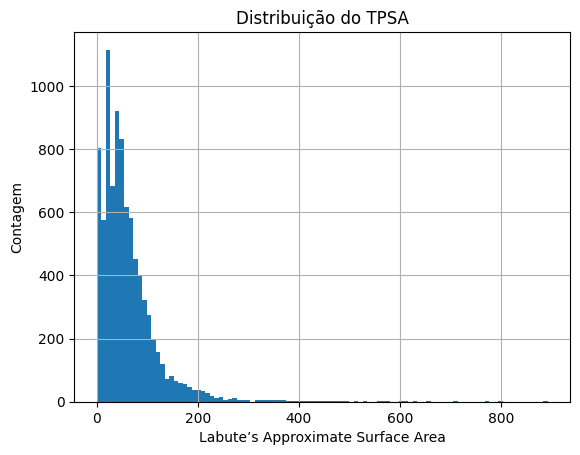

In [ ]:

data['TPSA'].hist(bins=100)
plt.title('Distribuição do TPSA')
plt.ylabel('Contagem')
plt.xlabel('Labute’s Approximate Surface Area')
plt.show()


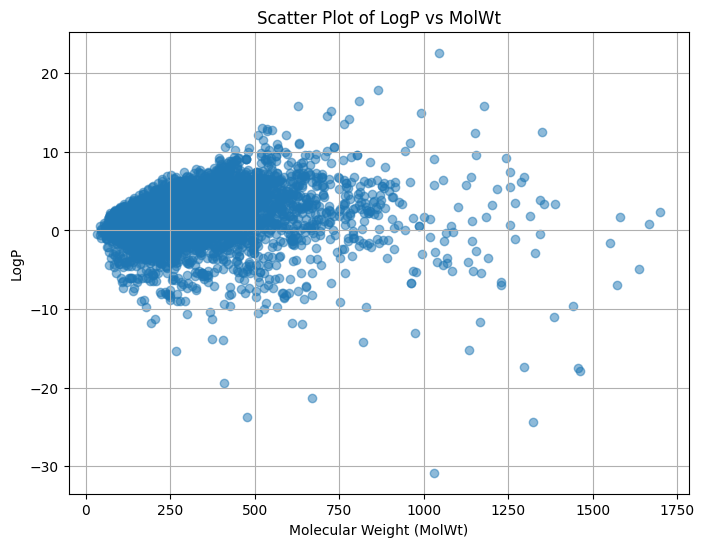

In [ ]:

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(data['MolWt'], data['LogP'], alpha=0.5)  # Create scatter plot
plt.xlabel('Molecular Weight (MolWt)')  # Set x-axis label
plt.ylabel('LogP')  # Set y-axis label
plt.title('Scatter Plot of LogP vs MolWt')  # Set plot title
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

**Geração das fingerprints**

# MACCS Fingerprints

,SMILES,ToxCast,ROMol,maccs
0,OCCOC(=O)C1=CC=CC=C1O,3,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(CC1=CC=CC=C1)NCCCCl,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
8740,CCCCCCCCNC,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8741,CCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,16,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8742,OC(=O)C1=CC=CC(Cl)=C1Cl,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8743,ClCC=CCl,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

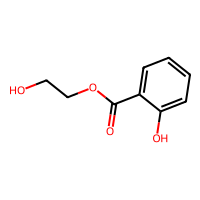
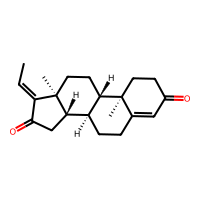
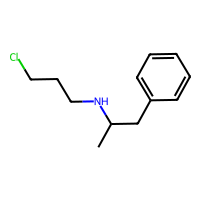
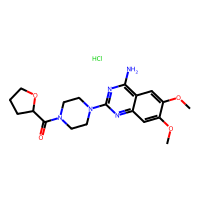
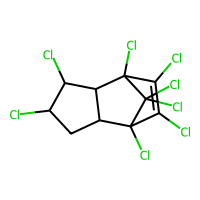
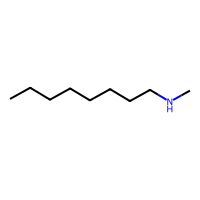
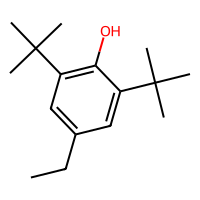
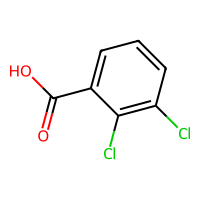
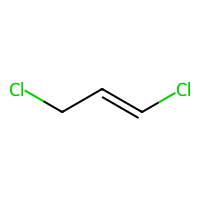
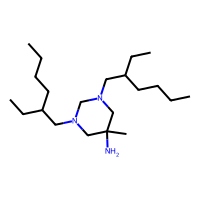

In [ ]:
from rdkit.Chem import MACCSkeys

def maccs_fp(mol):
   return MACCSkeys.GenMACCSKeys(mol)

data['maccs'] = data['ROMol'].apply(maccs_fp)
data

In [ ]:
len(data['maccs'].iloc[0])  # numero de elementos do vetor

167

# Morgan Fingerprint

In [ ]:
from rdkit.Chem import AllChem, rdFingerprintGenerator

In [ ]:
def morgan_fp(mol):
    morgan = AllChem.GetMorganGenerator(radius=2, fpSize=1024)  # <== numero de elementos
    return morgan.GetFingerprint(mol)

data['morgan'] = data['ROMol'].apply(morgan_fp)
data.head()

,SMILES,ToxCast,ROMol,maccs,morgan
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x7f645b3f74c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x7f645b3f4dd0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x7f645b3f7450>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x7f645b3f7530>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x7f645b3f75a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
len(data['morgan'].iloc[0]) # numero de elementos do vetor

1024

## Transformando as colunas ***fingerprint*** em uma matriz X de entrada para os modelos

In [ ]:
import numpy as np

# Convert 'morgan' column to NumPy array with fixed length
X = data['morgan'].apply(lambda x: np.pad(np.frombuffer(x.ToBinary(), dtype=np.uint8), (0, 1024 - len(np.frombuffer(x.ToBinary(), dtype=np.uint8))), 'constant'))

# Convert to a NumPy array before feeding to the model
X = np.stack(X.values)

print(X.shape)  # Verify the shape of the array

(8745, 1024)


In [ ]:
saida = data['ToxCast']   #separando a saida do modelo dos dados originais

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, saida, test_size=0.20, random_state=13)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=13)

# Modelo Keras Regressor

# Treinamento

In [ ]:
def ANN(fpSize: int):

    # Define o modelo ANN
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(800, activation='relu', input_shape=(fpSize,)),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) #Fixed: Removed extra indent

    return model

In [ ]:
# Train the model

# Aplica ANN
model = ANN(fpSize=1024)   # 4096
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 196.5166 - mae: 9.6516 - val_loss: 196.3550 - val_mae: 9.3939
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152.8616 - mae: 8.4551 - val_loss: 194.2932 - val_mae: 9.8093
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 145.9268 - mae: 8.2499 - val_loss: 207.8247 - val_mae: 8.8389
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 153.7881 - mae: 8.3317 - val_loss: 195.4739 - val_mae: 9.5836
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 144.9749 - mae: 8.2144 - val_loss: 204.4519 - val_mae: 9.2276
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 137.6422 - mae: 7.8670 - val_loss: 203.2601 - val_mae: 9.4425
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 142.5105 - mae: 7.9338 - val_loss: 201.5225 - val_mae: 9.9224
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 123.4939 - mae: 7.4925 - val_loss: 213.2187 - val_mae: 9.7783
Epoch 9/100
178/178 ━━━━━━━

In [ ]:
# Create the model instance
'''
model = ANN(fpSize=167)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20)  # Stop if val_loss doesn't improve for 10 epochs

history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stopping])
'''

"\nmodel = ANN(fpSize=167)\n\nfrom tensorflow.keras.callbacks import EarlyStopping\n\nearly_stopping = EarlyStopping(monitor='val_loss', patience=20)  # Stop if val_loss doesn't improve for 10 epochs\n\nhistory = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stopping])\n"

In [ ]:
# Assuming 'history' is the return value from keras_model.fit
train_losses = history.history['loss']
validation_losses = history.history['val_loss']

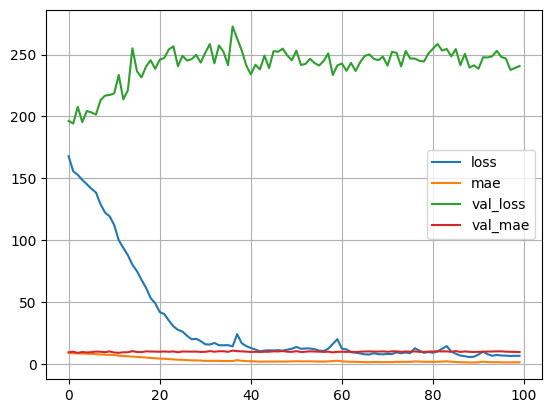

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

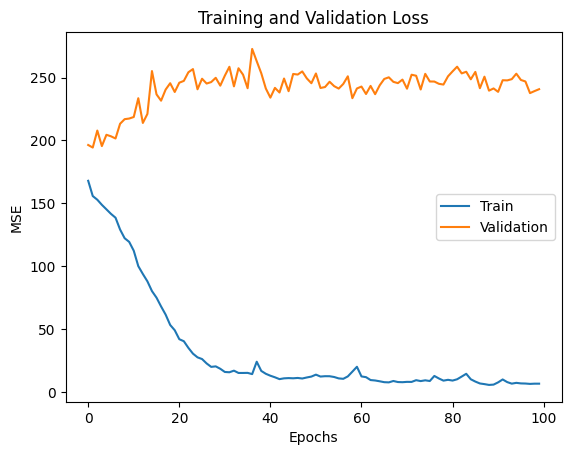

In [ ]:
# grafico dos resultados de treinamento
import matplotlib.pyplot as plt # Import the library

plt.plot(train_losses, label="Train")
plt.plot(validation_losses, label="Validation")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# calculo das previsões

ypred = model.predict(X_test) # Use Keras predict
ypredc = model.predict(X_train) # Use Keras predict
ypredv = model.predict(X_validation) # Use Keras predict

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


# Avaliação

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


# Obtem as métricas do modelo
loss, mae = model.evaluate(X_test, y_test)
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print('\n')
maet = mean_absolute_error(y_test, ypred)
mset = mean_squared_error(y_test, ypred)
rmset = math.sqrt(mset)
print("The mean absolute error (MAE) on test set: {:.4f}".format(maet))
print("The mean squared error (MSE) on test set: {:.4f}".format(mset)) # erro LOSS do conj teste
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))

msec = mean_squared_error(y_train, ypredc)
maec = mean_absolute_error(y_train, ypredc)
rmsec = math.sqrt(msec)
print('\n')
print("The mean absolute error (MAE) on training set: {:.4f}".format(maec))
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

msev = mean_squared_error(y_validation, ypredv)
maev = mean_absolute_error(y_validation, ypredv)
rmsev = math.sqrt(msev)
print('\n')
print("The mean absolute error (MAE) on validation set: {:.4f}".format(maev))
print("The mean squared error (MSE) on validation set: {:.4f}".format(msev))
print("The root mean squared error (RMSE) on validation set: {:.4f}".format(rmsev))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 177.6726 - mae: 8.1376
The mean absolute error (MAE) on test set: 8.4231


The mean absolute error (MAE) on test set: 8.4231
The mean squared error (MSE) on test set: 185.1490
The root mean squared error (RMSE) on test set: 13.6069


The mean absolute error (MAE) on training set: 1.9970
The mean squared error (MSE) on training set: 30.0238
The root mean squared error (RMSE) on training set: 5.4794


The mean absolute error (MAE) on validation set: 8.5138
The mean squared error (MSE) on validation set: 191.8440
The root mean squared error (RMSE) on validation set: 13.8508


In [ ]:
from sklearn.metrics import r2_score
# avaliação do conj teste
test_r2 = r2_score(y_test, ypred)
print('Reg linear coef R2 teste: ', test_r2)
print('\n')

# avaliação do conj validação
val_r2 = r2_score(y_validation, ypredv)
print('Reg linear coef R2 validação: ', val_r2)
print('\n')

# avaliação do conj calibração
cal_r2 = r2_score(y_train, ypredc)
print('Reg linear coef R2 calibração: ', cal_r2)

Reg linear coef R2 teste:  -0.1782923936843872


Reg linear coef R2 validação:  -0.21339404582977295


Reg linear coef R2 calibração:  0.8184258937835693


Text(0.5, 0, 'y experimental')

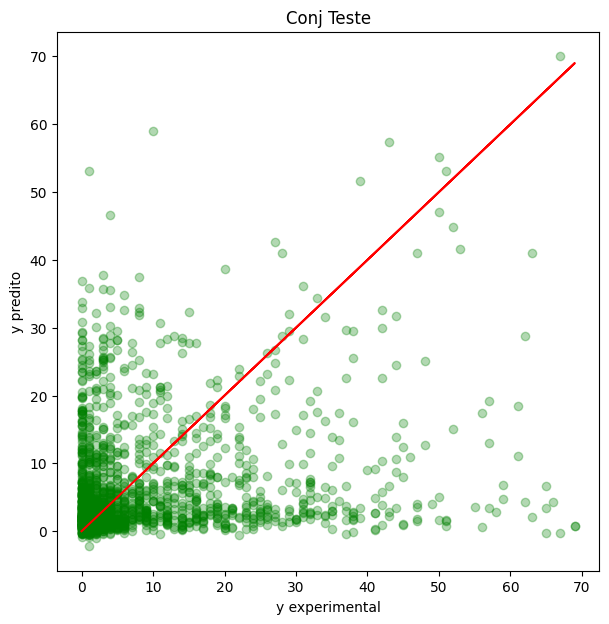

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_test, y=ypred, c='green' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_test, y_test, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_test, p(y_test), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Teste')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

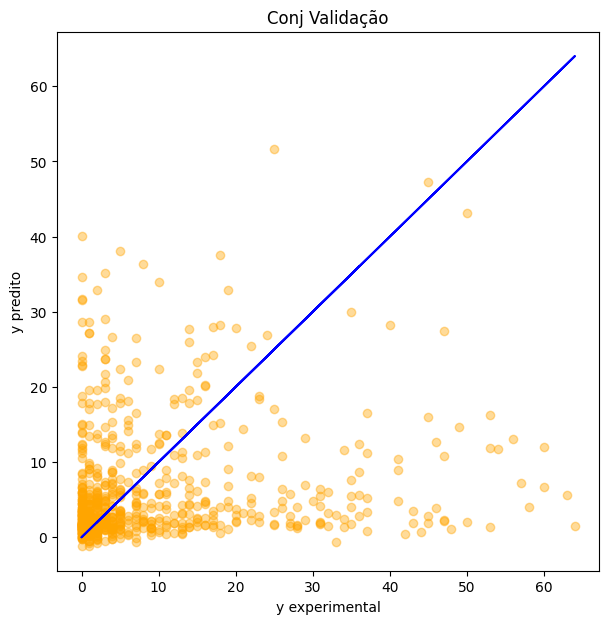

In [ ]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_validation, y=ypredv, c='orange' ,alpha=0.4) # dispersão dos dados

z = np.polyfit(y_validation, y_validation, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_validation, p(y_validation), 'blue')  # cor da linha e geraçao da mesma
plt.title('Conj Validação')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

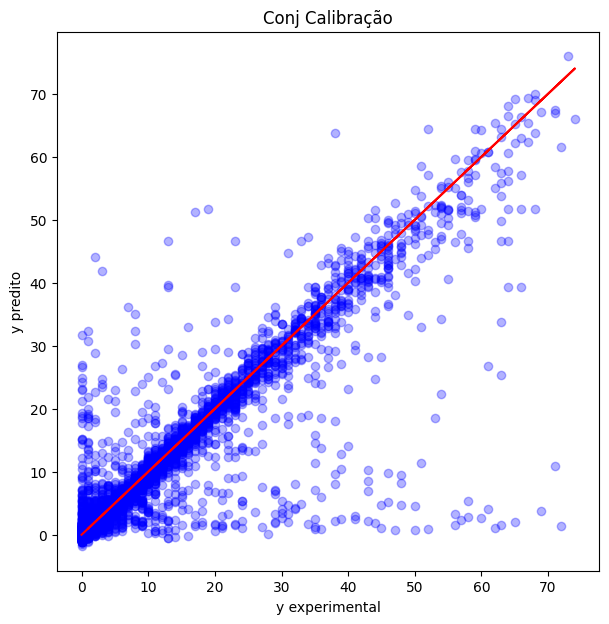

In [ ]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_train, y=ypredc, c='blue' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_train, y_train, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_train, p(y_train), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Calibração')
plt.ylabel('y predito')
plt.xlabel('y experimental')

<function matplotlib.pyplot.show(close=None, block=None)>

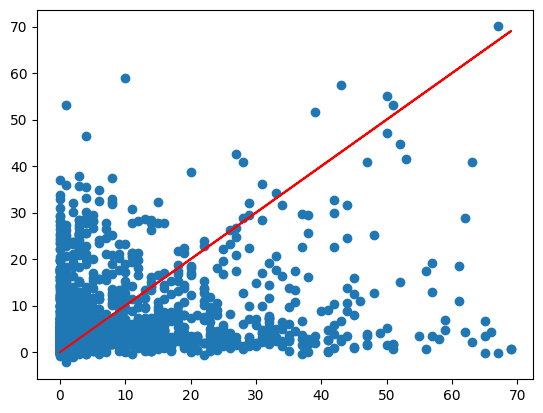

In [ ]:
plt.scatter(y_test, ypred)
plt.plot(y_test, y_test, color='red')
plt.show